# Banking EDA

## Project Description:-

The data use in this project are from an open-source set of bank marketing data from the UCI ML repository:

https://archive.ics.uci.edu/ml/citation_policy.html

During the work, the task of preliminary analysis of a positive response (term deposit) to a bank’s direct calls is resolved. The task to be met is therefore a question of bank rating or bank scoring, that is to say that according to the characteristics of a client (potentialclient), his behaviour is foreseen (default of payment, desire to make a deposit, etc.).
Throughout the project, we will try to answer a set of questions that may be relevant when analyzing bank data:

1. What is the proportion of customers attracted ?
2. What are the average values of the numerical features among the attracted clients ?
3. What is the average duration of calls for attracted clients ?
4. What is the average age of attracted and unmarried clients ?
5. What is the average age and duration of calls for different types of client employment ?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = 80
pd.options.display.max_rows = 1000000

## EDA:-

In [3]:
banking = pd.read_csv("bank-additional-full.csv", sep = ";")
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
banking.shape

(41188, 21)

##### The dataframe contains 41188 values (rows), for each of the 21 variables (columns), including a target variable "y".

In [5]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

##### Input features (column names):
1. `age` - client's age in years (numeric)
2. `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`,
`services`, `student`, `technician`, `unemployed`, `unknown`)
3. `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4. `education` - client's education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`,
`university.degree`, `unknown`)
5. `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6. `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7. `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8. `contact` - contact communication type (categorical: `cellular`, `telephone`)
9. `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means
the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
banking = pd.read_csv('bank-additional-full.csv', sep = ';')
banking.head()
banking.shape
banking.columns
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)
21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)


In [6]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### The dataframe is filled, it contains no missing values ('non-null') so there is no need to fill the gaps. On the other hand it contains 5 variables of integer type ('int64'), 5 variables of floating type ('float64') and 11 variables of categorical and binary type ('object').

In [7]:
banking.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
banking.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


##### The result shows that the average client refers to administrative staff ('job = admin.'), is married ('marital = married') and has a university degree ('education = university.degree').

In [9]:
banking.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
banking.y.value_counts(normalize = True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

##### 4640 customers or 11% of 41188 have issued a term deposit and 36548 or 89% have not done it.

In [11]:
round(banking.marital.value_counts(normalize = True),2)

married     0.61
single      0.28
divorced    0.11
unknown     0.00
Name: marital, dtype: float64

##### As we see 61% (0.61) of clients are married, a point to consider when planning marketing campaigns to manage deposit operations.

### || Sorting ||

In [12]:
banking.sort_values(by = "duration", ascending = True).head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28239,44,blue-collar,married,basic.9y,no,no,no,cellular,apr,tue,1,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no
40554,72,retired,married,professional.course,no,no,no,cellular,sep,wed,1,1,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,no
40687,38,services,single,high.school,no,yes,no,telephone,sep,thu,1,1,9,3,success,-1.1,94.199,-37.5,0.879,4963.6,no
24999,50,entrepreneur,married,basic.9y,no,no,no,telephone,nov,tue,2,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
5080,37,admin.,married,high.school,no,no,yes,telephone,may,fri,3,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6282,34,technician,single,professional.course,no,no,yes,telephone,may,tue,3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### The call durations exceeding one hour are 3600s and these calls took place Monday and Thursday ('day_of_week') in November and August ('month').

In [13]:
banking.sort_values(by = ["age","duration"], ascending =[True, False]).head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37125,18,student,single,basic.9y,no,yes,no,cellular,aug,tue,642,1,999,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,yes
37626,18,student,single,basic.6y,no,yes,no,cellular,aug,mon,628,1,999,0,nonexistent,-2.9,92.201,-31.4,0.861,5076.2,no
41084,18,student,single,unknown,no,yes,no,cellular,nov,tue,600,2,999,3,failure,-1.1,94.767,-50.8,1.049,4963.6,no
37955,18,student,single,unknown,no,yes,no,cellular,sep,fri,563,1,999,0,nonexistent,-3.4,92.379,-29.8,0.803,5017.5,yes
40379,18,student,single,unknown,no,yes,no,cellular,aug,wed,561,1,17,2,failure,-1.7,94.027,-38.3,0.900,4991.6,yes


##### The youngest clients are seventeen (17) years old for the 'age' variable, and their call times are greater than three (3) minutes for only three (3) of these customers.

In [14]:
banking.max()

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

##### The oldest client is ninety-eight (98) years old ('age' = 98), the number of contacts with one of the clients reaches 56 ('campaign' = 56).


In [15]:
d= {"no":0, "yes":1}
banking.y = banking.y.map(d)
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### || Questions & Answers ||

#### 1. What is the Proportion of clients attracted ?

In [16]:
print("Proportion of attracted clients =", "{:.1%}".format(banking["y"].mean()))

Proportion of attracted clients = 11.3%


#### 2. What are the average values of the numerical features among the attracted clients?

In [17]:
round(banking[banking.y==1].mean(),2)

age                 40.91
duration           553.19
campaign             2.05
pdays              792.04
previous             0.49
emp.var.rate        -1.23
cons.price.idx      93.35
cons.conf.idx      -39.79
euribor3m            2.12
nr.employed       5095.12
y                    1.00
dtype: float64

#### 3. What is the average duration of calls for attracted clients ?

In [18]:
acd = (banking.duration[banking.y==1].mean())
acd_in_min = acd // 60
print("Average call duration for attracted clients=", acd_in_min,
      "minutes", acd % 60, "seconds" )

Average call duration for attracted clients= 9.0 minutes 13.191163793103442 seconds


#### 4. What is the average age of attracted and unmarried clients?

In [19]:
print("Average age of attracted and unmarried clients =",
      int(banking.age[(banking.y == 1) &
                      (banking.marital == "single")].mean()), "years")

Average age of attracted and unmarried clients = 31 years


### || Pivot tables ||

In [20]:
pd.crosstab(banking.y, banking.marital)

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


##### The result shows that the number of attracted married clients is 2532 from the total number.

In [21]:
round(pd.crosstab(banking.y, banking.marital, normalize = "index"),2)

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.0
1,0.10,0.55,0.35,0.0


In [22]:
round(banking.pivot_table(["age", "duration"],["job"], aggfunc = "mean").head(10),2)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


### || Visualization ||

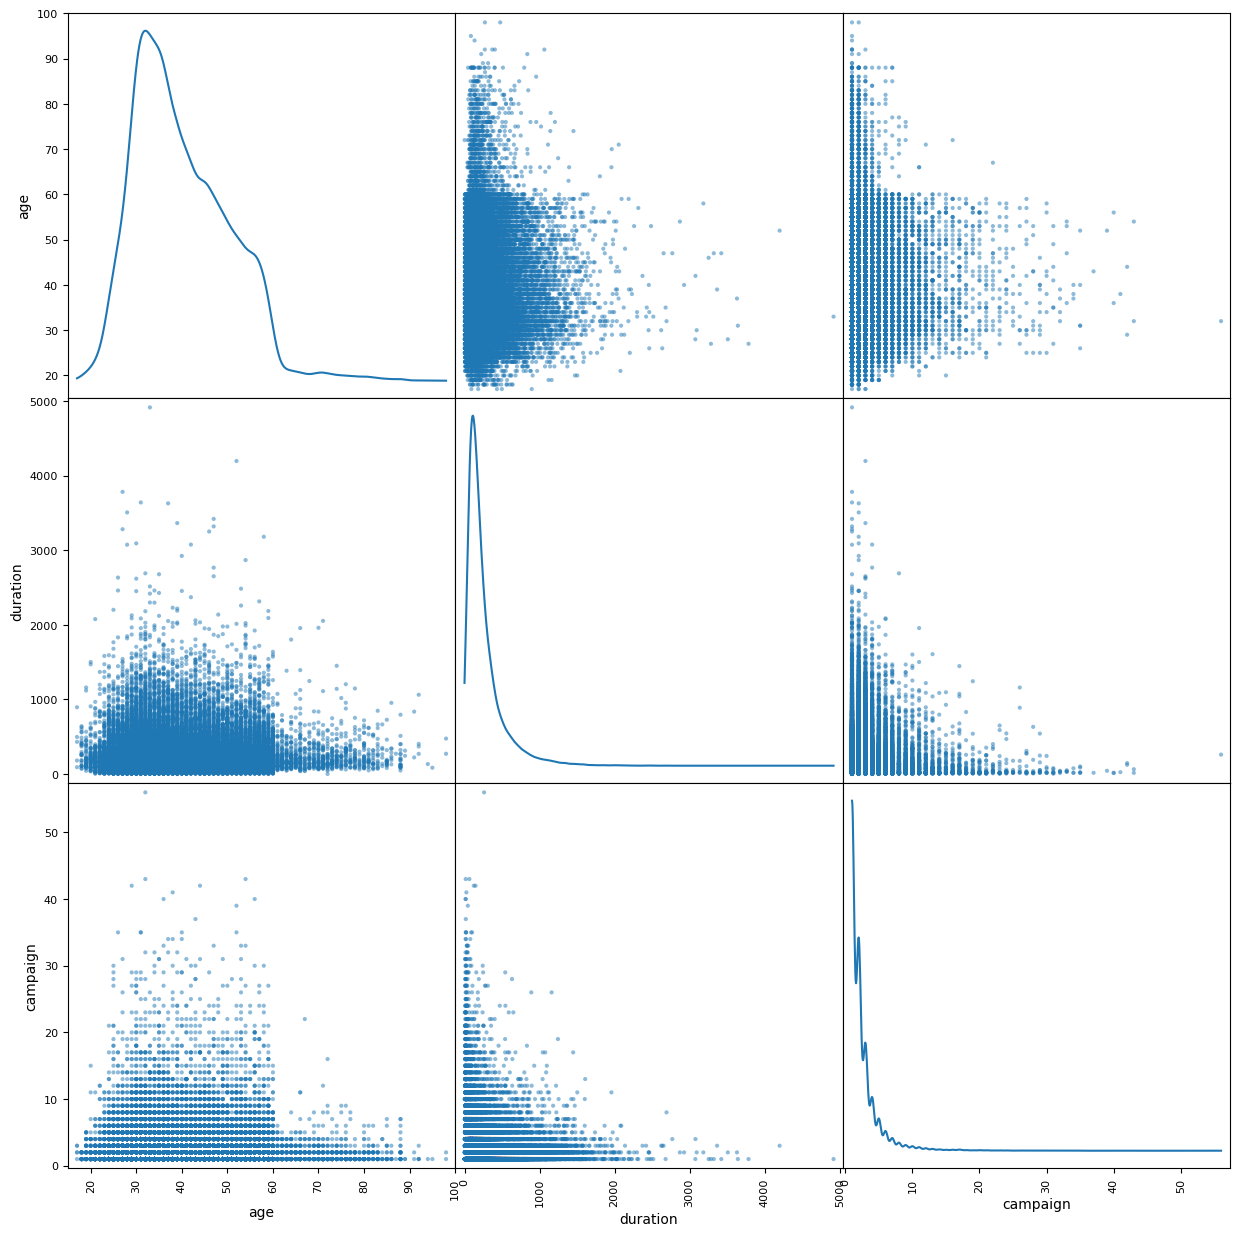

In [23]:
pd.plotting.scatter_matrix(banking[["age","duration","campaign"]],
                           diagonal="kde",figsize = (15,15))
plt.show()

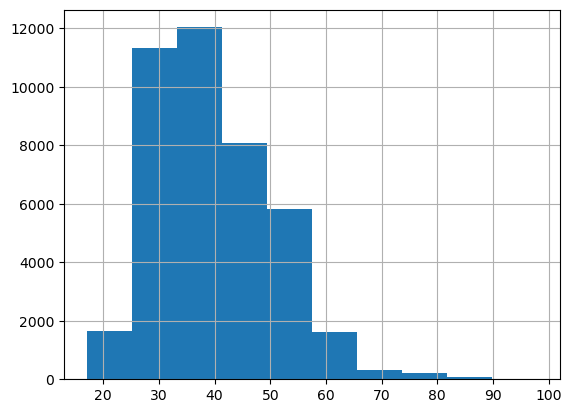

In [24]:
banking.age.hist()
plt.show()

##### The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

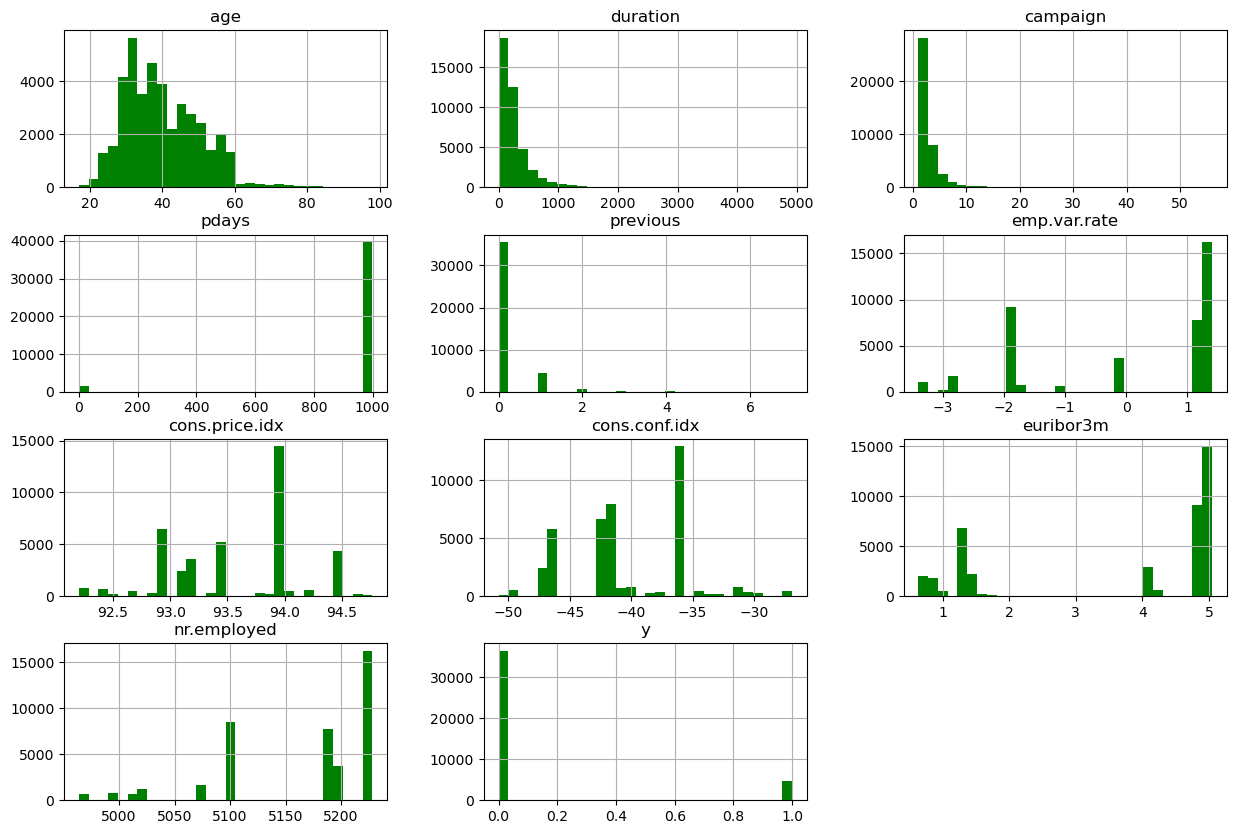

In [25]:
banking.hist(color= "green" , bins = 30,figsize = (15,10))
plt.show()

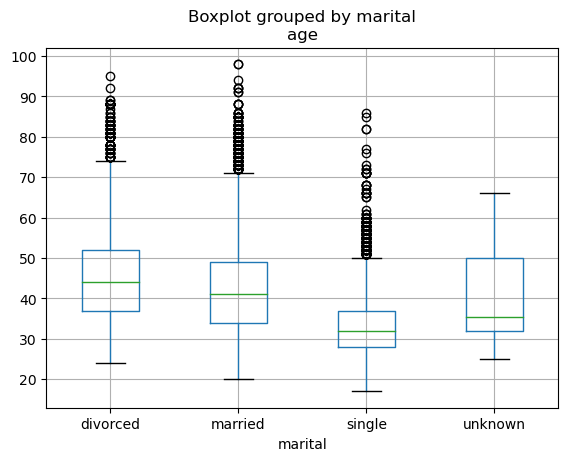

In [26]:
banking.boxplot(column = "age",by = "marital")
plt.show()

##### The plot shows that unmarried people are on average younger than divorced and married ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.


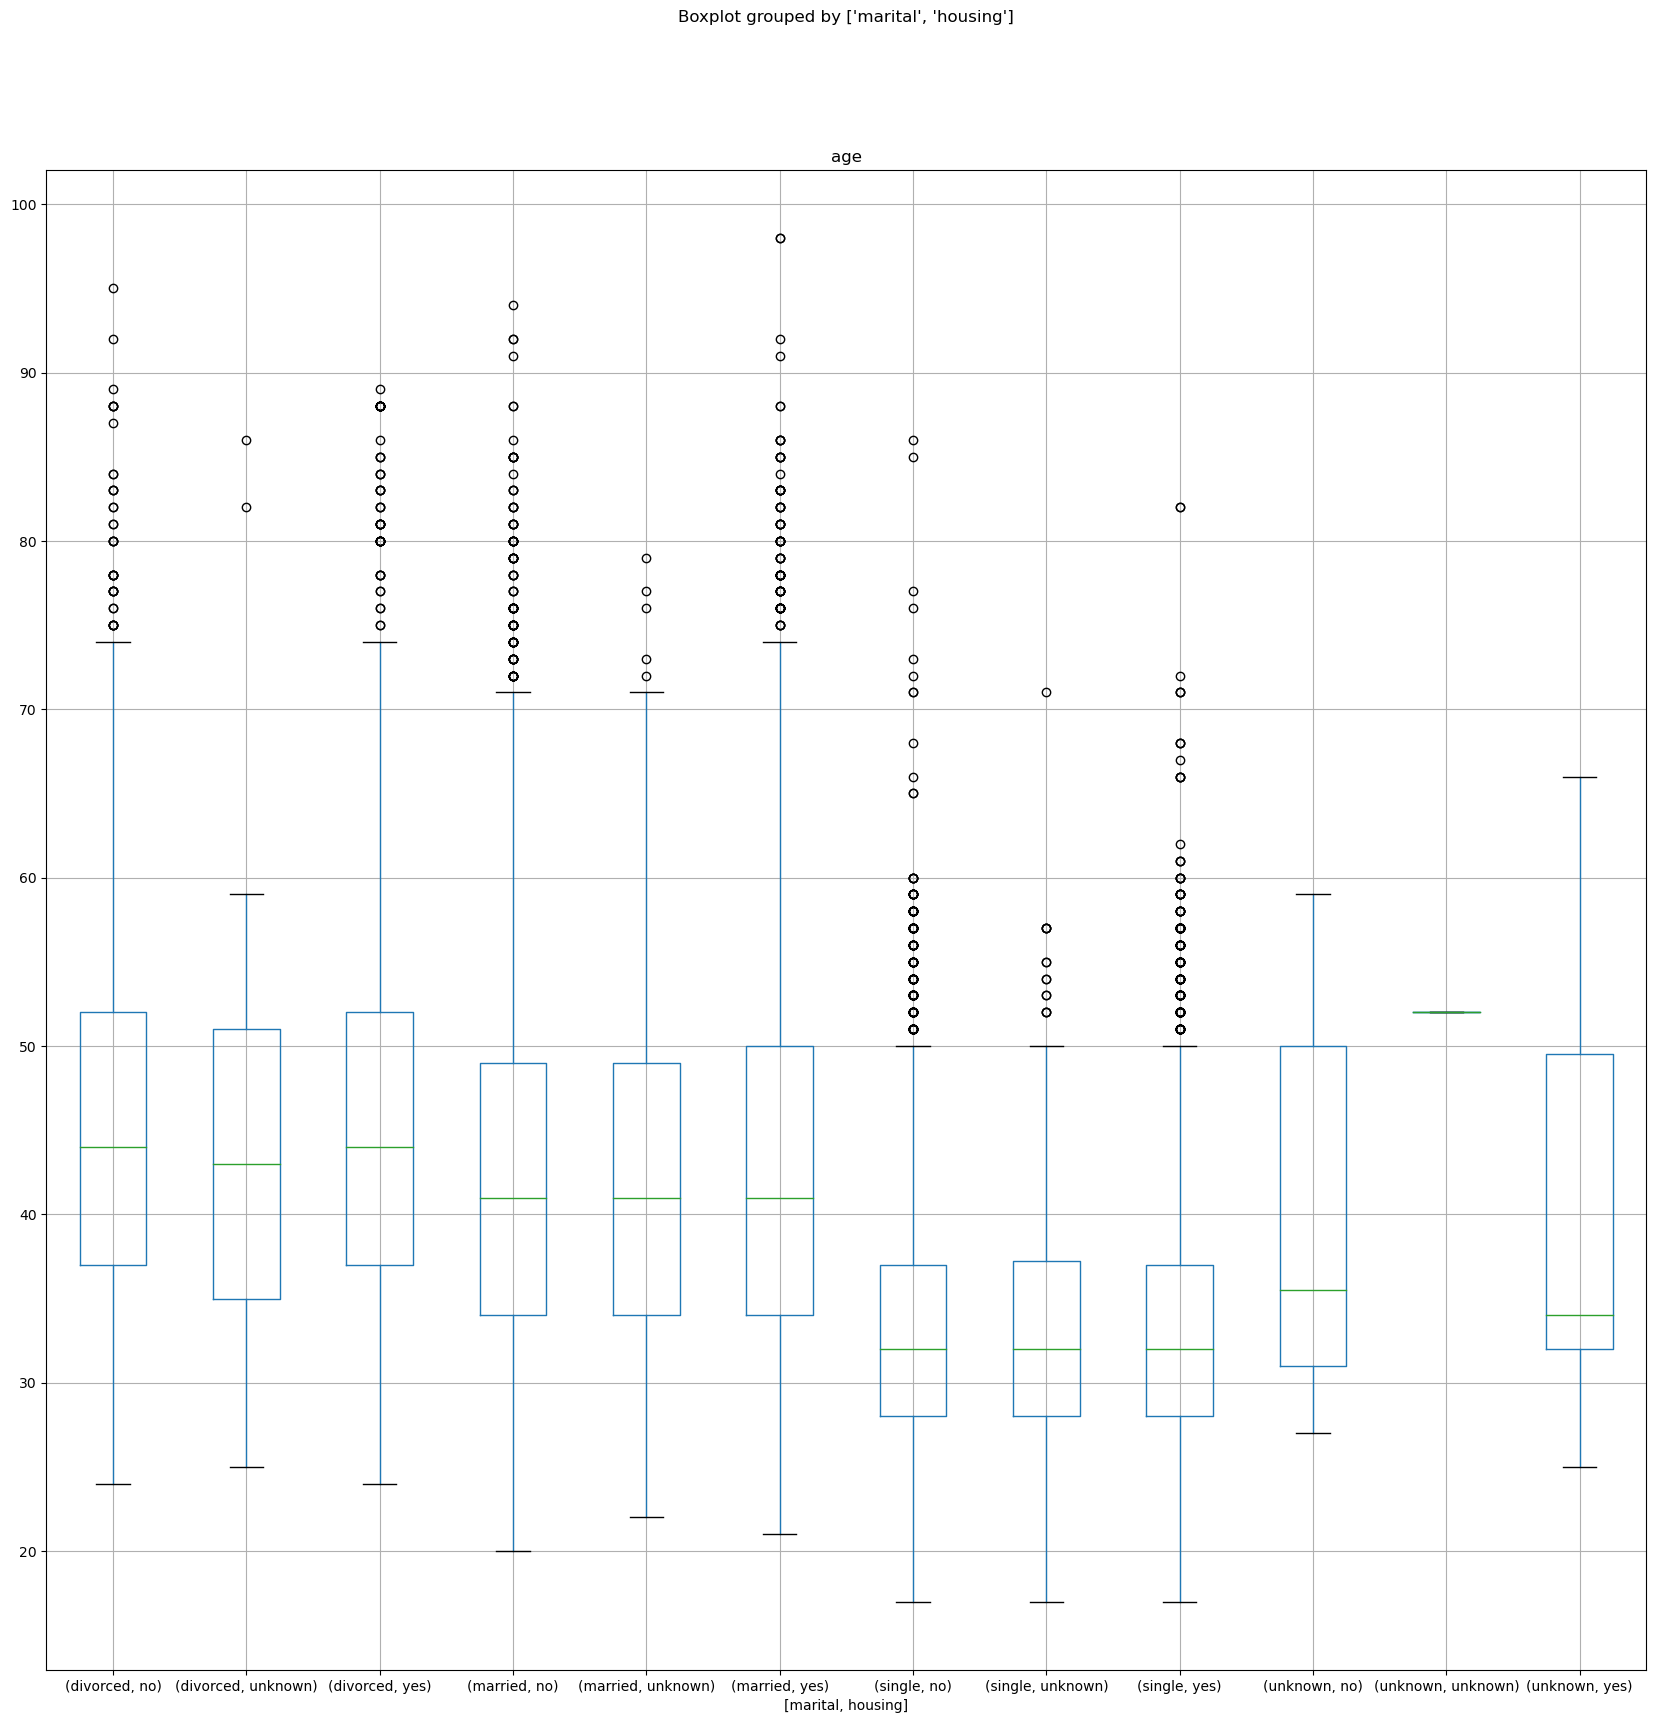

In [27]:
banking.boxplot(column = "age", by = ["marital", "housing"], figsize=(20,20))
plt.show()

##### As we can see, age and marital status don't have any significant influence on having a housing loan.

### || Additional Questions ||

 #### 1. List 10 clients with the largest number of contacts.

In [28]:
banking.sort_values(by="campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,65,43,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,16,43,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,124,42,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,147,42,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,25,41,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,18,40,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,13,40,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,44,39,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,17,37,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0


#### 2. Determine the median age and the number of contacts for different levels of client education.

In [29]:
banking.pivot_table(["age","campaign"],["education"], aggfunc =["mean","count"])

mean            count         
                           age  campaign    age campaign
education                                               
basic.4y             47.596504  2.600575   4176     4176
basic.6y             40.448953  2.556283   2292     2292
basic.9y             39.061208  2.532341   6045     6045
high.school          37.998213  2.568576   9515     9515
illiterate           48.500000  2.277778     18       18
professional.course  40.080107  2.586115   5243     5243
university.degree    38.879191  2.563527  12168    12168
unknown              43.481225  2.596187   1731     1731

#### 4. Output boxplot to analyze the client age distribution by their education level.

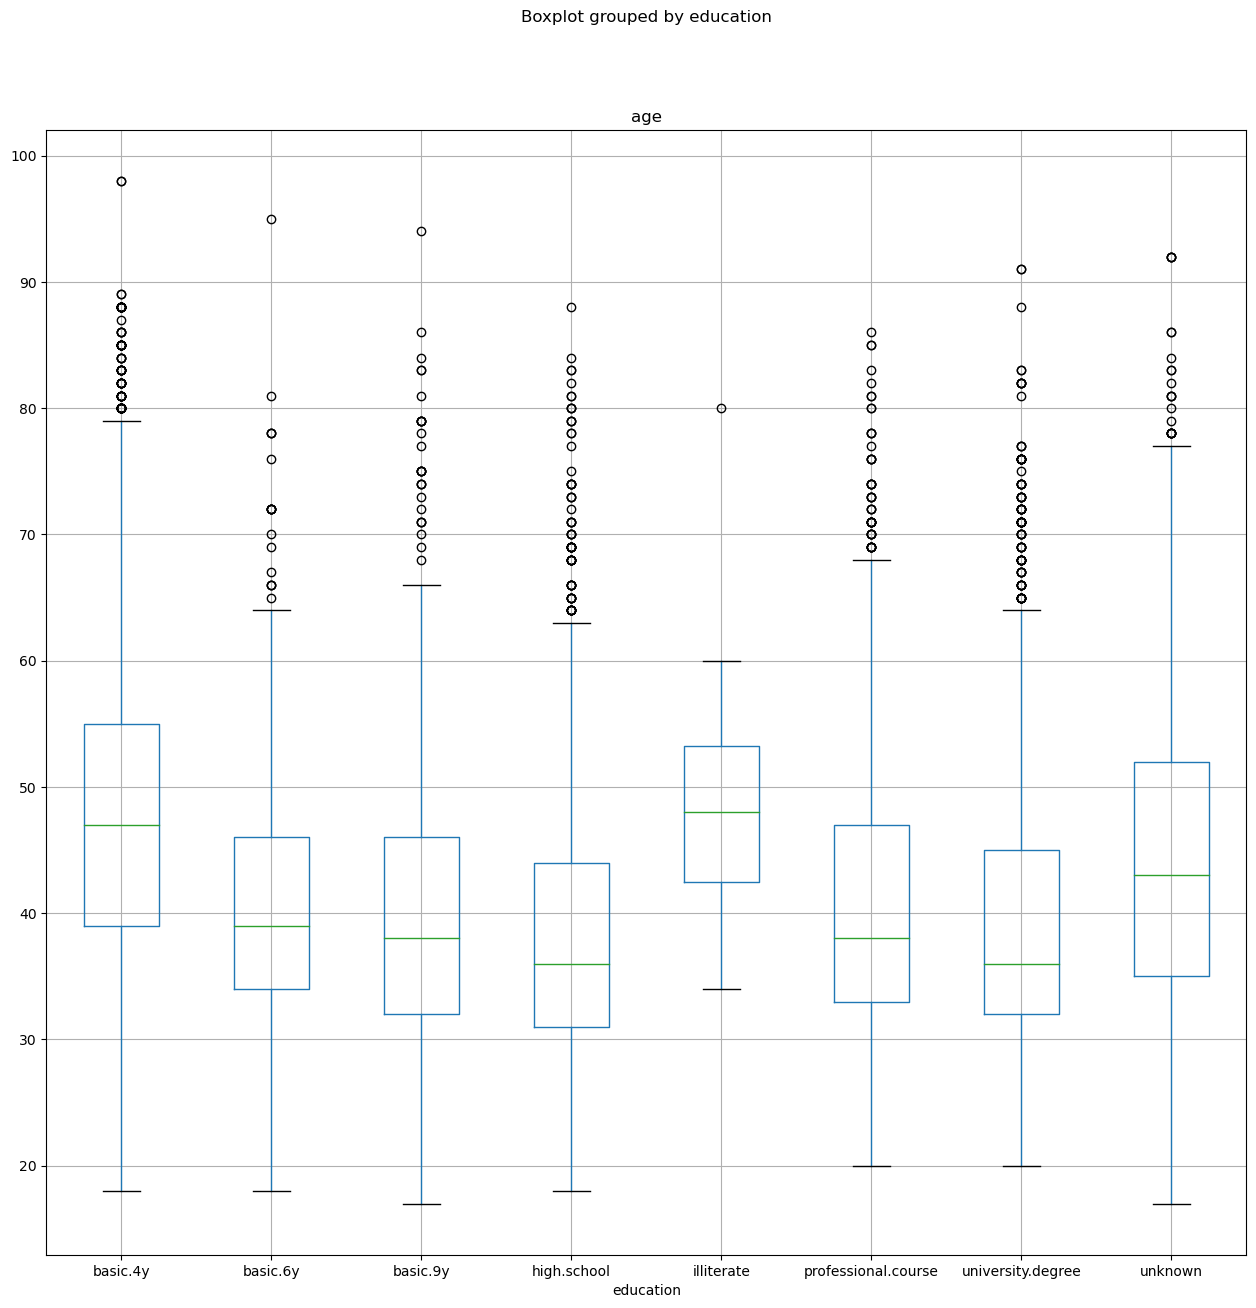

In [30]:
banking.boxplot(column="age",by="education",figsize=(15,15))
plt.show()